#Import Libraries

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
from  numpy import genfromtxt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,confusion_matrix)
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



Load The Dataset

In [2]:
df = pd.read_csv("/content/KDDTrain+.txt", delimiter=',')

In [3]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

In [12]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [8]:
df.shape

(148516, 43)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148516 entries, 0 to 148515
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148516 non-null  int64  
 1   protocol_type                148516 non-null  object 
 2   service                      148516 non-null  object 
 3   flag                         148516 non-null  object 
 4   src_bytes                    148516 non-null  int64  
 5   dst_bytes                    148516 non-null  int64  
 6   land                         148516 non-null  int64  
 7   wrong_fragment               148516 non-null  int64  
 8   urgent                       148516 non-null  int64  
 9   hot                          148516 non-null  int64  
 10  num_failed_logins            148516 non-null  int64  
 11  logged_in                    148516 non-null  int64  
 12  num_compromised              148516 non-null  int64  
 13 

In [14]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,148516.000000,1.485160e+05,1.485160e+05,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,...,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000
mean,276.781168,4.022822e+04,1.708897e+04,0.000215,0.020523,0.000202,0.189380,0.004323,0.402792,0.255063,...,119.463297,0.534523,0.084103,0.145932,0.030584,0.256124,0.251306,0.136221,0.136398,19.278475
std,2460.691310,5.409630e+06,3.703537e+06,0.014677,0.240070,0.019417,2.013167,0.072248,0.490461,22.231450,...,111.232422,0.448062,0.194103,0.308639,0.108975,0.428501,0.429720,0.322742,0.335283,2.739766
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [15]:
df.describe(include="O")

,protocol_type,service,flag,attack
count,148516,148516,148516,148516
unique,3,70,11,40
top,tcp,http,SF,normal
freq,121568,48191,89819,77053


##Check if there is Null values

In [16]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [17]:
df.nunique()

duration                        3424
protocol_type                      3
service                           70
flag                              11
src_bytes                       3601
dst_bytes                      10401
land                               2
wrong_fragment                     3
urgent                             4
hot                               29
num_failed_logins                  6
logged_in                          2
num_compromised                   96
root_shell                         2
su_attempted                       3
num_root                          91
num_file_creations                36
num_shells                         4
num_access_files                  10
num_outbound_cmds                  1
is_host_login                      2
is_guest_login                     2
count                            512
srv_count                        512
serror_rate                       99
srv_serror_rate                   94
rerror_rate                       98
s

##Check if there are duplicated rows.

In [18]:
df.duplicated().sum()

610

In [4]:
df = df.drop_duplicates()

In [20]:
df.shape

(147906, 43)

Make attack columns as normal or attacking 'binary classification

In [5]:
#type of attack in this dataset
types = df["attack"].unique()
types

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', nan], dtype=object)

In [6]:
target = types[1:]
target

array(['neptune', 'warezclient', 'ipsweep', 'portsweep', 'teardrop',
       'nmap', 'satan', 'smurf', 'pod', 'back', 'guess_passwd',
       'ftp_write', 'multihop', 'rootkit', 'buffer_overflow', 'imap',
       'warezmaster', 'phf', 'land', 'loadmodule', 'spy', 'perl', nan],
      dtype=object)

In [7]:
df["attack"].replace(to_replace=target,value="attacking", inplace = True)

In [35]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,attacking,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,attacking,21


##Visualize Categorical Columns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


le pourcentage des normal trafic est:0.5203710464754642
le pourcentage des Anormal trafic est:0.47962895352453583


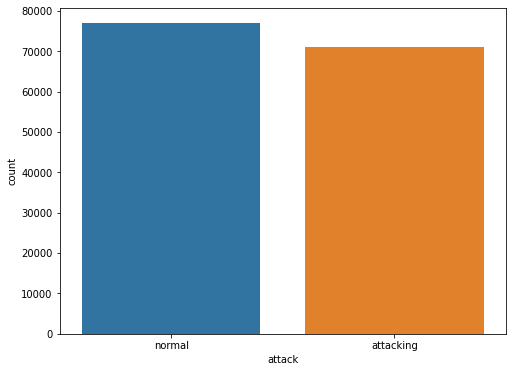

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(df['attack'])
yes=df['attack'].value_counts()[0]/len(df['attack'])
no=df['attack'].value_counts()[1]/len(df['attack'])
print(f'le pourcentage des normal trafic est:{yes}')
print(f'le pourcentage des Anormal trafic est:{no}')

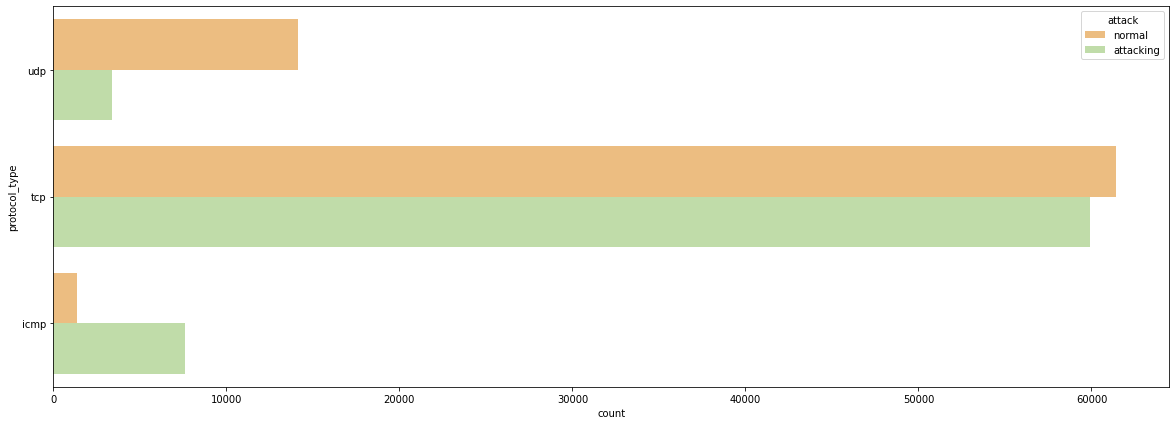

In [46]:
plt.figure(figsize = (20,7))
sns.countplot(data=df, y=df.protocol_type , hue = 'attack', palette="Spectral")

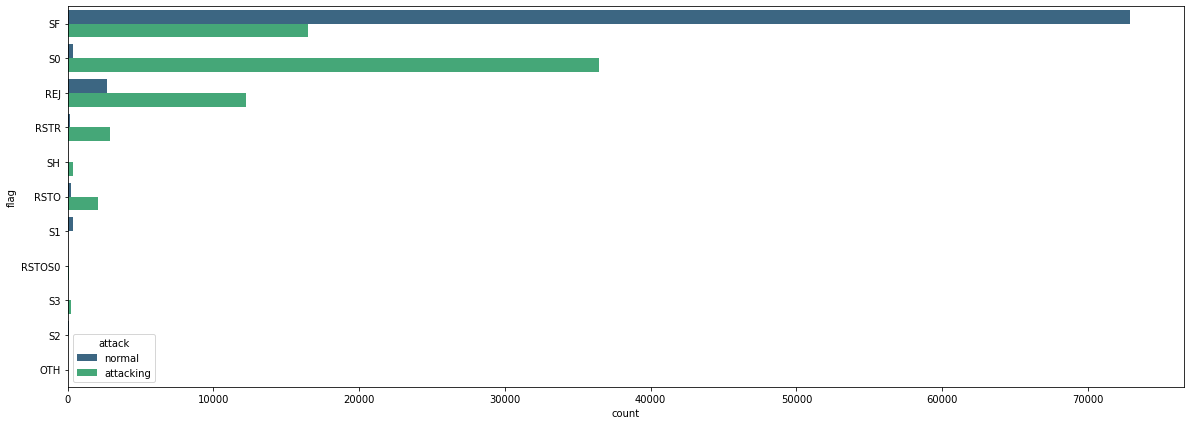

In [38]:
plt.figure(figsize = (20,7))
sns.countplot(data=df, y=df.flag, hue="attack" , palette="viridis")

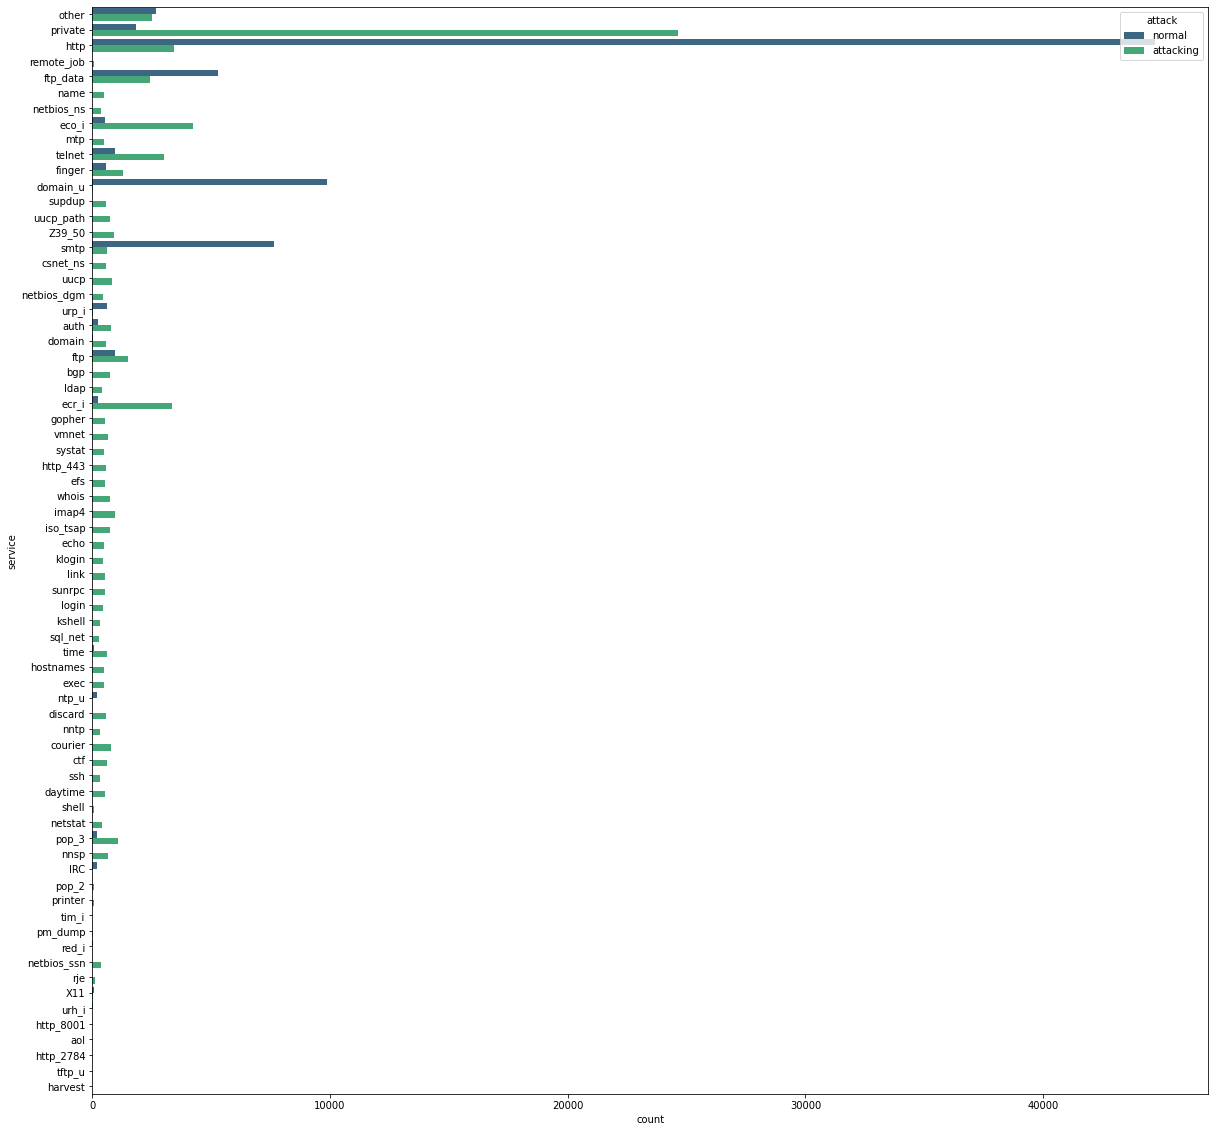

In [45]:
plt.figure(figsize = (20,20))
sns.countplot(data=df, y=df.service, hue="attack" , palette="viridis")

## Visualize Numerical Columns

In [8]:
c = len(df.select_dtypes(include=["number"]).columns)
c

39

In [9]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [51]:
def create_plot_pivot(df, x_column):
    _df_plot = df.groupby([x_column, 'attack']).size() \
    .reset_index().pivot(columns='attack', index=x_column, values=0)
    return _df_plot

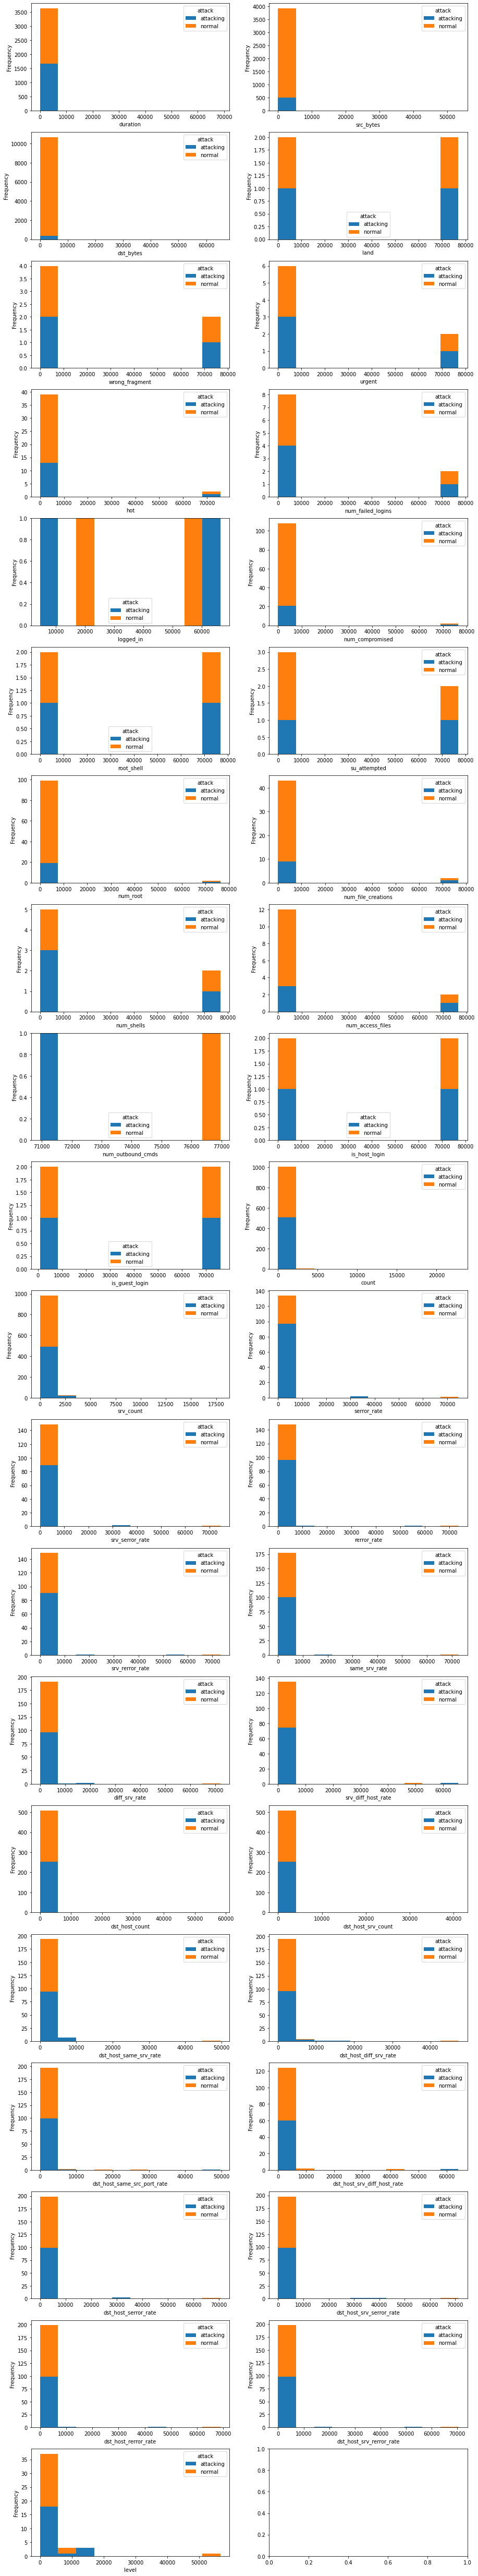

In [53]:
fig, ax = plt.subplots(20, 2, figsize=(15,90))
axe = ax.ravel()

for i in range(c):
    create_plot_pivot(df, numerical_cols[i]).plot(kind='hist',stacked=True, ax=axe[i])
    axe[i].set_xlabel(numerical_cols[i])
    
fig.show()

In [12]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,attacking,19.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,attacking,21.0


##Preprocessing

In [13]:
#categorique sdata and nemerique data
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else :
    num_data.append(df.iloc[:,i])
cat_data=pd.DataFrame(cat_data)
num_data=pd.DataFrame(num_data)

In [15]:
cat_data.T

,protocol_type,service,flag,attack
0,udp,other,SF,normal
1,tcp,private,S0,attacking
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,attacking
...,...,...,...,...
89853,tcp,private,S0,attacking
89854,tcp,ftp,SF,normal
89855,tcp,supdup,S0,attacking
89856,udp,domain_u,SF,normal


In [55]:
cat_data.isnull().sum().any()

False

In [16]:
cat_data=cat_data.T
num_data=num_data.T

In [17]:
target=cat_data['attack']
cat_data.drop('attack',axis=1,inplace=True)

In [18]:
for i in range(len(target)):
  if target[i]!='normal':
    target[i]=0
  else :
    target[i]=1

In [19]:
target

0        1
1        0
2        1
3        1
4        0
        ..
89853    0
89854    1
89855    0
89856    1
89857    0
Name: attack, Length: 89858, dtype: object

In [20]:
le=LabelEncoder()
for i in cat_data:
  cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,protocol_type,service,flag
0,2,44,9
1,1,49,5
2,1,24,9
3,1,24,9
4,1,49,1
...,...,...,...
89853,1,49,5
89854,1,19,9
89855,1,58,5
89856,2,12,9


In [21]:
x=pd.concat([cat_data,num_data],axis=1)
y=target

In [22]:
y.value_counts()

1    48003
0    41855
Name: attack, dtype: int64

In [26]:
df=pd.concat([x,y],axis=1)

In [27]:
df.head()

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack
0,2,44,9,0.0,146.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15.0,1
1,1,49,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19.0,0
2,1,24,9,0.0,232.0,8153.0,0.0,0.0,0.0,0.0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21.0,1
3,1,24,9,0.0,199.0,420.0,0.0,0.0,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21.0,1
4,1,49,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21.0,0


##Correlation

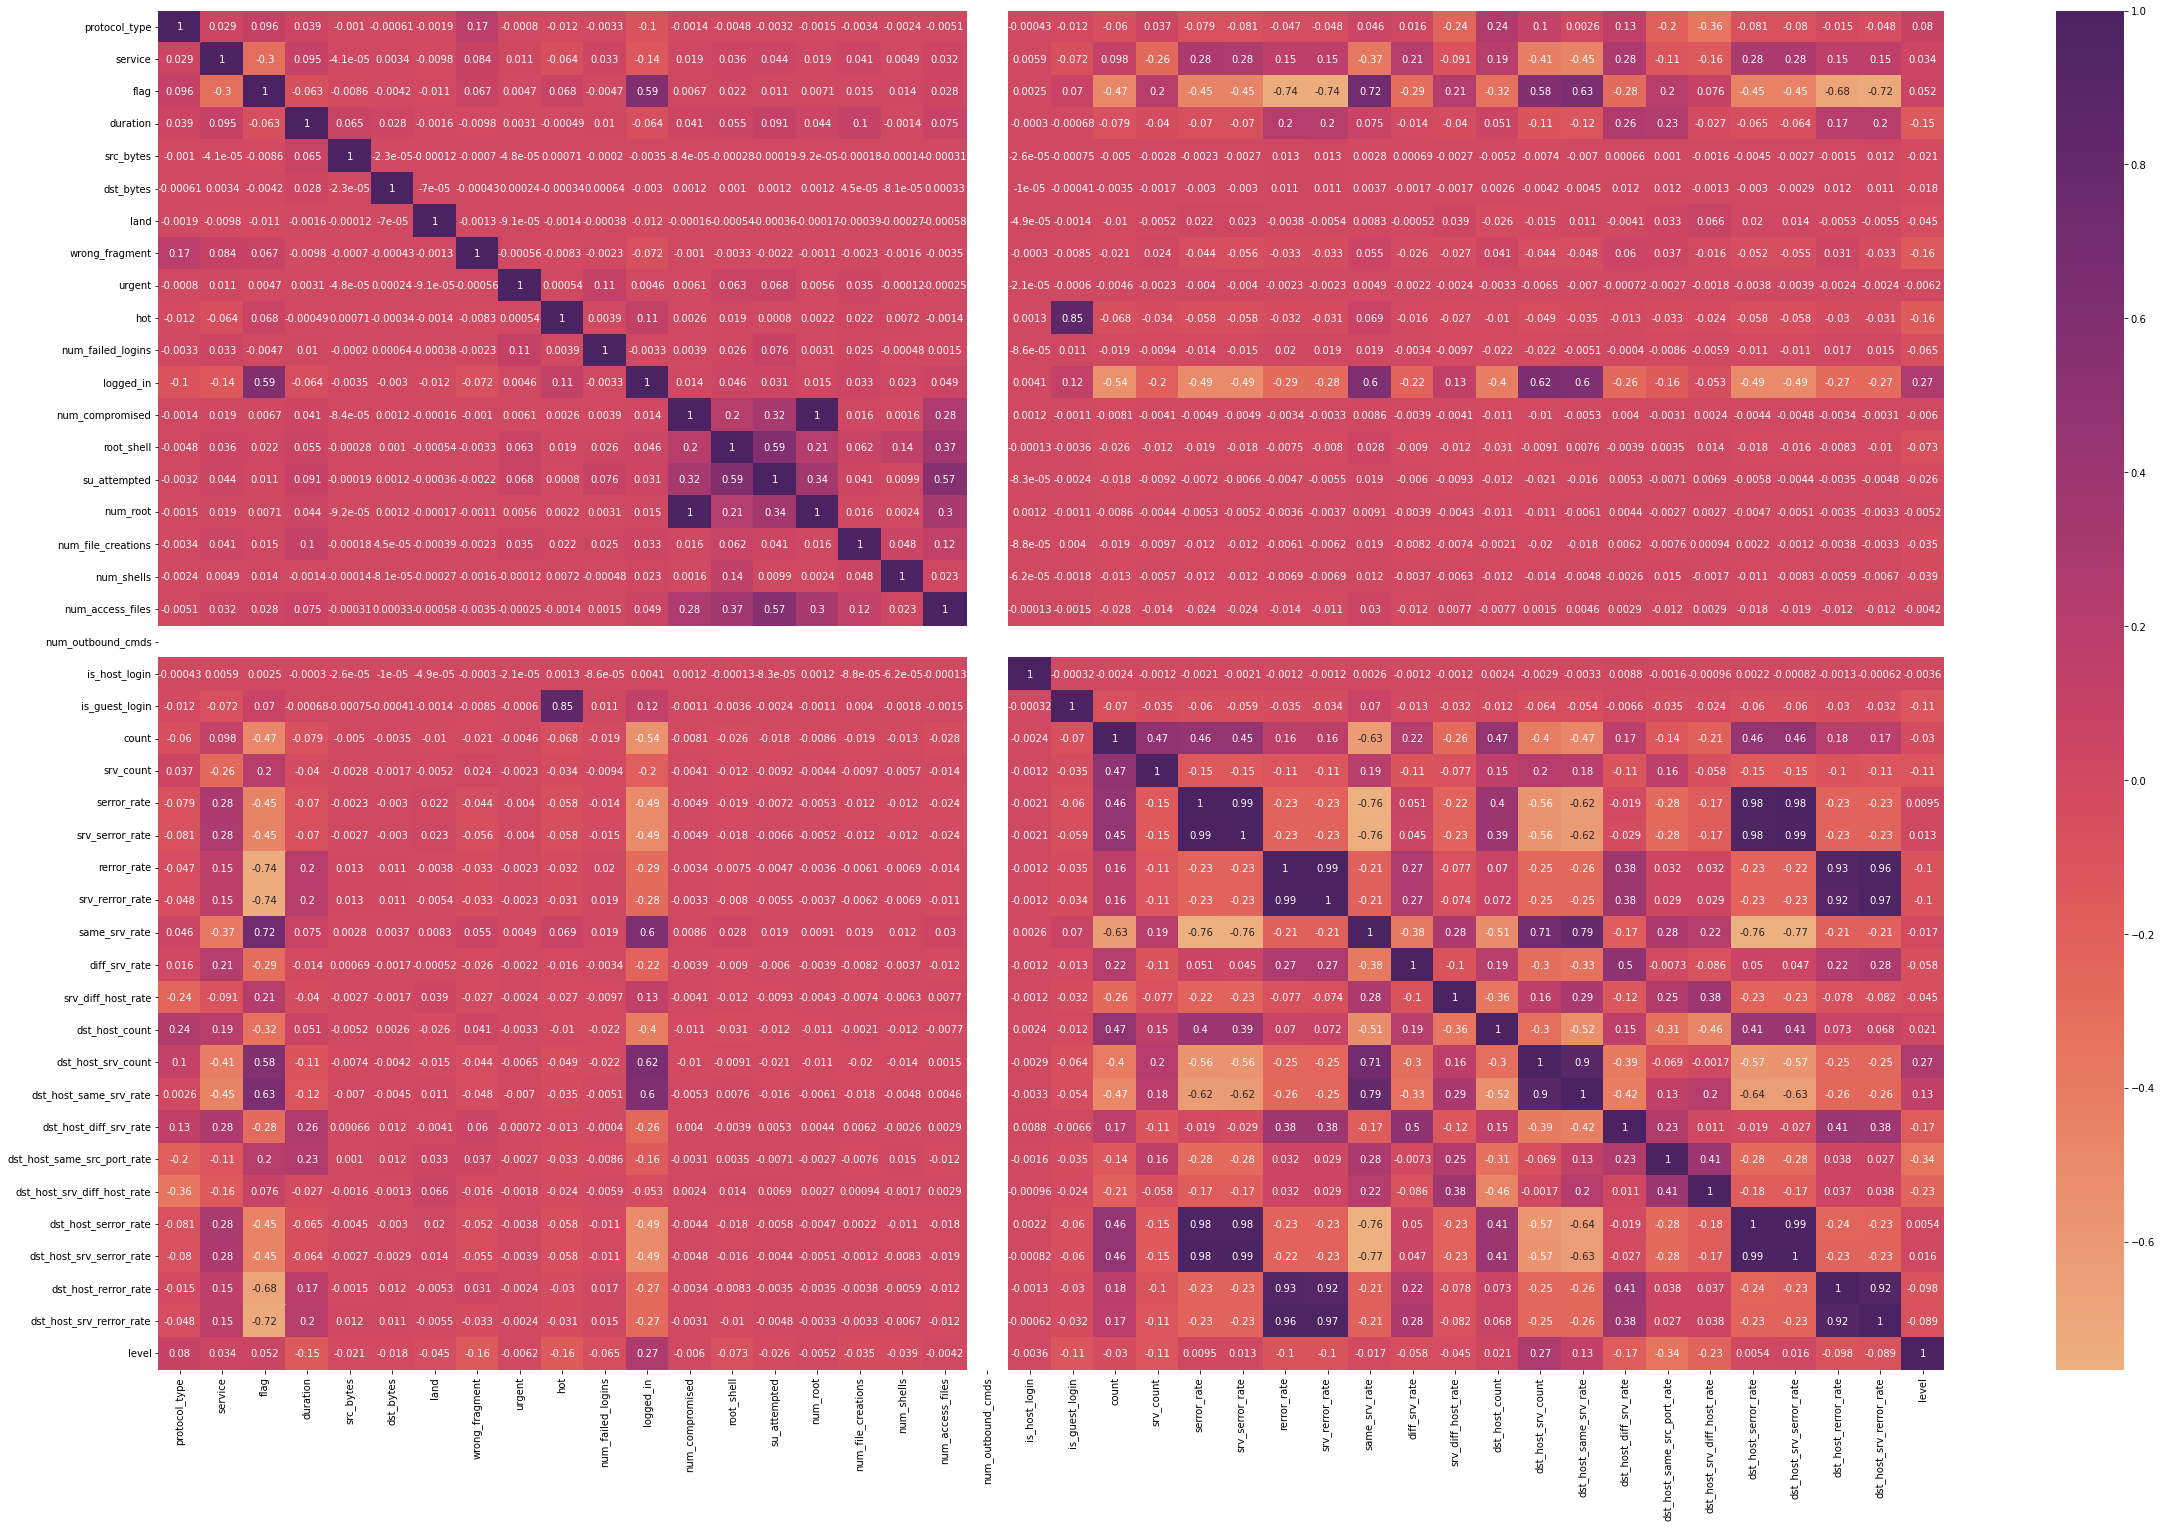

In [28]:
plt.figure(figsize=(40,25))
sns.heatmap(df.corr(),annot= True,cmap = 'flare')
plt.show()

In [29]:
# Create correlation matrix
corr_matrix = df.corr().abs()
corr_matrix

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
protocol_type,1.000000,0.028866,0.095907,0.038960,0.001021,0.000612,0.001855,0.169391,0.000803,0.011913,...,0.102402,0.002636,0.133017,0.203974,0.357553,0.081445,0.079952,0.015375,0.047827,0.080055
service,0.028866,1.000000,0.304691,0.094879,0.000041,0.003429,0.009848,0.083968,0.011037,0.063586,...,0.409380,0.454217,0.281586,0.111195,0.158662,0.283825,0.279625,0.149088,0.146821,0.034422
flag,0.095907,0.304691,1.000000,0.062825,0.008563,0.004163,0.010739,0.066549,0.004728,0.067642,...,0.584026,0.631465,0.281621,0.196936,0.076282,0.446401,0.446088,0.680947,0.717673,0.051869
duration,0.038960,0.094879,0.062825,1.000000,0.065264,0.028330,0.001605,0.009770,0.003058,0.000494,...,0.109739,0.116072,0.257029,0.230024,0.026586,0.064763,0.064138,0.174290,0.198343,0.154066
src_bytes,0.001021,0.000041,0.008563,0.065264,1.000000,0.000023,0.000116,0.000702,0.000048,0.000708,...,0.007351,0.007045,0.000656,0.000999,0.001646,0.004451,0.002671,0.001463,0.012172,0.020782
dst_bytes,0.000612,0.003429,0.004163,0.028330,0.000023,1.000000,0.000070,0.000428,0.000238,0.000340,...,0.004233,0.004452,0.011547,0.011730,0.001266,0.002960,0.002879,0.011800,0.011300,0.018013
land,0.001855,0.009848,0.010739,0.001605,0.000116,0.000070,1.000000,0.001288,0.000091,0.001358,...,0.014627,0.010884,0.004125,0.033347,0.066329,0.019505,0.013601,0.005292,0.005451,0.045435
wrong_fragment,0.169391,0.083968,0.066549,0.009770,0.000702,0.000428,0.001288,1.000000,0.000557,0.008266,...,0.044126,0.047804,0.059728,0.037217,0.016284,0.051524,0.055478,0.031378,0.033186,0.156808
urgent,0.000803,0.011037,0.004728,0.003058,0.000048,0.000238,0.000091,0.000557,1.000000,0.000543,...,0.006474,0.007026,0.000724,0.002733,0.001817,0.003750,0.003942,0.002430,0.002358,0.006160
hot,0.011913,0.063586,0.067642,0.000494,0.000708,0.000340,0.001358,0.008266,0.000543,1.000000,...,0.049339,0.034866,0.012701,0.033453,0.023550,0.057504,0.057587,0.029549,0.030761,0.160296


In [30]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

<ipython-input-30-765c5967d629>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
protocol_type,NaN,0.028866,0.095907,0.038960,0.001021,0.000612,0.001855,0.169391,0.000803,0.011913,...,0.102402,0.002636,0.133017,0.203974,0.357553,0.081445,0.079952,0.015375,0.047827,0.080055
service,NaN,NaN,0.304691,0.094879,0.000041,0.003429,0.009848,0.083968,0.011037,0.063586,...,0.409380,0.454217,0.281586,0.111195,0.158662,0.283825,0.279625,0.149088,0.146821,0.034422
flag,NaN,NaN,NaN,0.062825,0.008563,0.004163,0.010739,0.066549,0.004728,0.067642,...,0.584026,0.631465,0.281621,0.196936,0.076282,0.446401,0.446088,0.680947,0.717673,0.051869
duration,NaN,NaN,NaN,NaN,0.065264,0.028330,0.001605,0.009770,0.003058,0.000494,...,0.109739,0.116072,0.257029,0.230024,0.026586,0.064763,0.064138,0.174290,0.198343,0.154066
src_bytes,NaN,NaN,NaN,NaN,NaN,0.000023,0.000116,0.000702,0.000048,0.000708,...,0.007351,0.007045,0.000656,0.000999,0.001646,0.004451,0.002671,0.001463,0.012172,0.020782
dst_bytes,NaN,NaN,NaN,NaN,NaN,NaN,0.000070,0.000428,0.000238,0.000340,...,0.004233,0.004452,0.011547,0.011730,0.001266,0.002960,0.002879,0.011800,0.011300,0.018013
land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001288,0.000091,0.001358,...,0.014627,0.010884,0.004125,0.033347,0.066329,0.019505,0.013601,0.005292,0.005451,0.045435
wrong_fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000557,0.008266,...,0.044126,0.047804,0.059728,0.037217,0.016284,0.051524,0.055478,0.031378,0.033186,0.156808
urgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000543,...,0.006474,0.007026,0.000724,0.002733,0.001817,0.003750,0.003942,0.002430,0.002358,0.006160
hot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.049339,0.034866,0.012701,0.033453,0.023550,0.057504,0.057587,0.029549,0.030761,0.160296


In [31]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_rerror_rate']

In [33]:
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [35]:
df.head()

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,level,attack
0,2,44,9,0.0,146.0,0.0,0.0,0.0,0.0,0.0,...,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.0,15.0,1
1,1,49,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,255.0,26.0,0.10,0.05,0.00,0.00,0.0,19.0,0
2,1,24,9,0.0,232.0,8153.0,0.0,0.0,0.0,0.0,...,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.0,21.0,1
3,1,24,9,0.0,199.0,420.0,0.0,0.0,0.0,0.0,...,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.0,21.0,1
4,1,49,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,255.0,19.0,0.07,0.07,0.00,0.00,1.0,21.0,0


##Split train and test data to X,Y

In [36]:
x = df.drop(['attack'] , axis = 1).values
y = df['attack'].values

##Data Scaling using Standard Scalar

In [37]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)
X_scaled

array([[ 2.2150647 ,  0.77669488,  0.75168472, ..., -0.28881532,
        -0.38627325, -1.95738762],
       [-0.12758965,  1.08226059, -0.73845952, ..., -0.28881532,
        -0.38627325, -0.21853893],
       [-0.12758965, -0.44556798,  0.75168472, ...,  0.06938277,
        -0.38627325,  0.65088541],
       ...,
       [-0.12758965,  1.63227888, -0.73845952, ..., -0.28881532,
        -0.38627325,  0.21617324],
       [ 2.2150647 , -1.1789257 ,  0.75168472, ..., -0.28881532,
        -0.38627325, -0.6532511 ],
       [-0.12758965, -0.44556798,  0.75168472, ...,         nan,
                nan,         nan]])

In [38]:
X_scaled.shape

(89858, 36)

##Train Test Split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled, y,test_size=0.2,random_state=42)

In [40]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)


In [41]:
X_test.shape

(17972, 36)

In [42]:
y_test.shape

(17972,)

In [43]:
X_train.shape

(71886, 36)

##Model

In [44]:
#construction de reseau de neuron
model=tf.keras.Sequential()

In [45]:
model.add(tf.keras.layers.Dense(units=20,activation='relu',kernel_initializer='uniform',input_dim=36))

In [46]:
model.add(tf.keras.layers.Dense(units=10,activation='relu',kernel_initializer='uniform'))

In [47]:
model.add(tf.keras.layers.Dense(units=5,activation='relu',kernel_initializer='uniform'))

In [48]:
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                740       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,011
Trainable params: 1,011
Non-trainable params: 0
_________________________________________________________________


##fit the model

In [51]:
model.fit(X_train,y_train,batch_size=10000,epochs=1000)

Epoch 1/1000
8/8 [==============================] - 2s 9ms/step - loss: 0.6930 - binary_accuracy: 0.5354
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.6926 - binary_accuracy: 0.5354
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6919 - binary_accuracy: 0.5354
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6906 - binary_accuracy: 0.5354
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6880 - binary_accuracy: 0.5354
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6827 - binary_accuracy: 0.5354
Epoch 7/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.6734 - binary_accuracy: 0.5354
Epoch 8/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.6581 - binary_accuracy: 0.5354
Epoch 9/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.6338 - binary_accuracy: 0.5354
Epoch 10/1000
8/8 [==============================] - 

##Evaluation

In [52]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)


562/562 [==============================] - 1s 1ms/step - loss: nan - binary_accuracy: 0.9983


In [53]:
print(f'test accuracy est:{test_accuracy} et test loss {test_loss}')

test accuracy est:0.9983307123184204 et test loss nan


In [54]:
y_pred=model.predict(X_test)

562/562 [==============================] - 1s 1ms/step


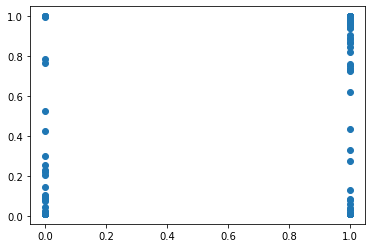

In [55]:
plt.scatter(y_test,y_pred)
plt.show()

In [71]:
y_pred = np.asarray(y_pred).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [61]:
np.any(np.isnan(y_pred))

True

In [62]:
np.all(np.isfinite(y_pred))

False

In [78]:
y_test

array([0., 1., 1., ..., 1., 0., 1.], dtype=float32)

In [77]:
y_pred.astype(int).all()==y_test.astype(int).all()

True

In [87]:
print("Accuracy:",metrics.accuracy_score(y_test.astype(int), y_pred.astype(int)))

Accuracy: 0.9751279768528822


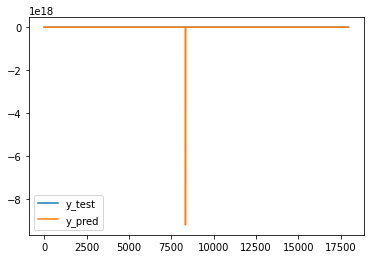

In [91]:
plt.plot(y_test.astype(int), label='y_test')
plt.plot(y_pred.astype(int), label='y_pred')
plt.legend()
plt.show()

In [101]:
accuracy = accuracy_score(y_test.astype(int), y_pred.astype(int))


f1 = f1_score(y_test.astype(int), y_pred.astype(int),average='micro')


In [103]:
f1

0.9751279768528822

In [107]:
def confusion_matrix_2x2(y_true, y_pred):
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for i, j in zip(y_true, y_pred):
        if i == 1 and j == 1:
            tp += 1
        elif i == 1 and j == 0:
            fn += 1
        elif i == 0 and j == 1:
            fp += 1
        else:
            tn += 1
    return [[tp, fp], [fn, tn]]

In [108]:
confusion_matrix_2x2(y_test,y_pred)

[[9073, 1], [0, 8898]]